In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import pandas as pd

# Replace 'your_file.txt' with the path to your file
file_path = r'D:\tfolder\codingFile\AIlearning\Data_challenge_UIT\LSTM\spam_sms_LSTM\SMSSpamCollection.txt'

# Read the tab-separated file into a DataFrame
df = pd.read_csv(file_path, sep='\t', header=None, names=['Classification', 'SMS'])

# Display the DataFrame
df.head(10)


,Classification,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Text(0.5, 1.0, 'Number of ham and spam messages')

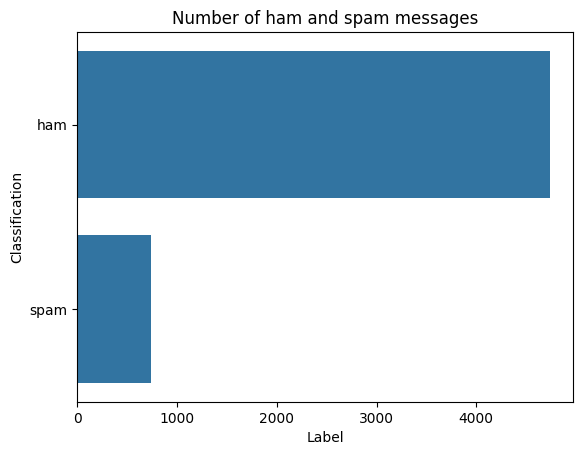

In [3]:
sns.countplot(df.Classification)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

### Label encoding: if ham then 0 else then 1

In [4]:
X = df.SMS
Y = df.Classification
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
print(Y)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [6]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)  # Fit tokenizer on training data
print(tok.word_index)                   #1 : most frequent word, 2: second frequent

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, 'now': 19, 'that': 20, '2': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'or': 26, 'do': 27, "i'm": 28, 'at': 29, 'can': 30, 'ur': 31, 'be': 32, 'will': 33, 'get': 34, 'just': 35, 'with': 36, 'if': 37, 'no': 38, 'this': 39, 'we': 40, 'gt': 41, 'lt': 42, '4': 43, 'when': 44, 'up': 45, 'how': 46, 'ok': 47, 'out': 48, 'what': 49, 'all': 50, 'free': 51, 'from': 52, 'go': 53, 'good': 54, 'know': 55, 'like': 56, 'got': 57, 'then': 58, 'come': 59, 'day': 60, 'am': 61, 'its': 62, 'was': 63, 'time': 64, 'there': 65, 'only': 66, 'love': 67, 'want': 68, 'he': 69, 'send': 70, 'as': 71, 'text': 72, 'txt': 73, 'one': 74, 'going': 75, 'ü': 76, 'sorry': 77, 'need': 78, 'by': 79, "i'll": 80, 'home': 81, 'r': 82, 'about': 83, 'lor': 84, 'see': 85, 'today': 86, 'stop': 87, 'back': 88, 'da': 89, 'n': 90, 'our': 91, 'dont': 92, 

In [9]:
sequences = tok.texts_to_sequences(X_train)  # Convert texts to sequences
print(sequences)
sequences_pad = sequence.pad_sequences(sequences, maxlen=max_len)  # Pad sequences
print(sequences_pad.shape)

[[51, 194, 26, 832, 36, 127, 525, 51, 228, 574, 274, 51, 16, 683, 18, 26, 16], [17, 54, 461], [28, 25, 186, 1, 63, 35, 964, 48, 49, 63, 219, 5, 833], [96, 778, 1, 71, 10, 4, 44, 22, 6, 51], [116, 6, 316, 11, 117], [304, 104, 254, 575, 400, 1, 526, 1, 235, 114, 139, 552, 155, 1, 261, 104, 965, 136, 199, 58, 104, 575], [14, 9, 66, 481, 552, 552], [684, 13, 357, 779, 12, 381, 966, 202, 1, 527, 685, 16, 780, 462, 729, 781, 967], [782, 4, 1, 27, 188, 73, 2, 834, 401, 127, 220, 216, 117, 18, 228], [1, 528, 783, 52, 503, 7, 14, 48, 373], [402, 50, 442, 1, 504, 358, 15, 8, 10, 78, 2, 428, 4, 463, 23, 32, 14, 287, 181, 10, 75, 7, 71, 6, 156, 20, 1, 34, 5, 317, 2, 34, 189, 5, 275], [62, 892, 2, 575, 263, 56, 39, 50, 30, 170, 24, 112, 229, 604, 190, 2, 10], [30, 3, 105, 70, 10, 11, 145], [35, 1, 112, 62, 182, 482, 2, 166, 209, 20, 55, 5, 230, 115, 4, 20, 9, 182, 2, 255, 3, 784, 203, 263, 56, 4, 113, 382, 44, 8, 151, 968, 835], [70, 118, 74, 2, 91, 229, 42, 553, 41, 86], [37, 74, 30, 27, 14, 6, 13

### Define RNN structure

In [10]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [11]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 150, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(sequences_pad,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9913 - loss: 0.0295 - val_accuracy: 0.9828 - val_loss: 0.0638
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9828 - val_loss: 0.0631
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9955 - loss: 0.0212 - val_accuracy: 0.9860 - val_loss: 0.0680


In [16]:
# Preprocess the test data
X_test_sequences = tok.texts_to_sequences(X_test)  # Convert texts to sequences
X_test_pad = sequence.pad_sequences(X_test_sequences, maxlen=max_len)  # Pad sequences

# Predict the labels for the test set
y_pred = model.predict(X_test_pad)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9853836784409257

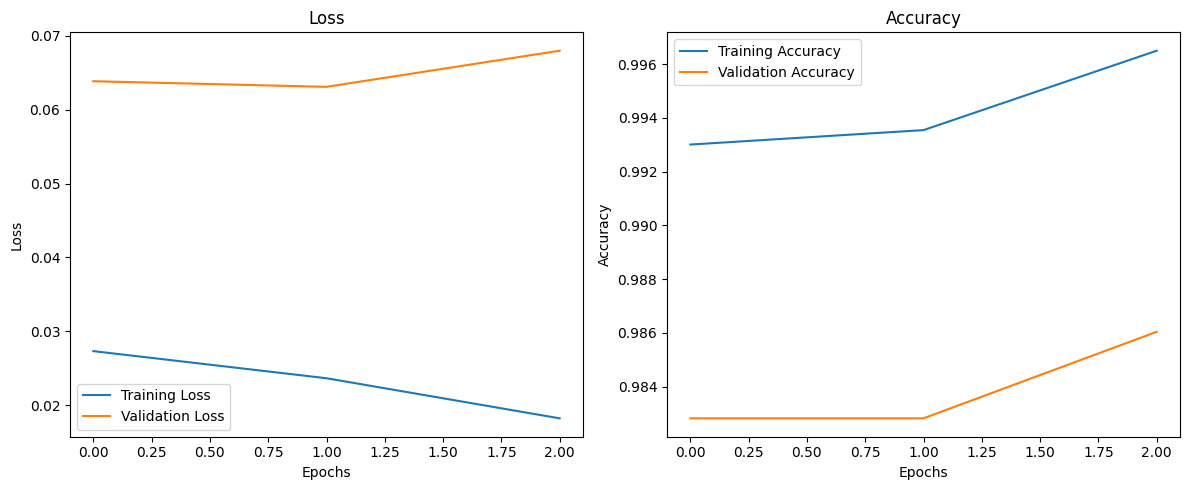

In [24]:
plt.figure(figsize=(12, 5))

# Vẽ đồ thị Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()